In [1]:
import os
import charts_function_list

In [2]:
base_path, data, outputs = charts_function_list.folder_setup()

In [205]:
os.chdir(data)
dc_ratings = pd.read_csv('dc_movie_ratings.csv')

In [288]:
colors = {'WB Batman':'#238b45', 
         'Dark Knight Trilogy':'#252525', 
         'DC Extended Universe':'#084594', 
         'Superman':'#ef3b2c',  
         'Other':'Gold'}

dc_ratings['color']=dc_ratings['Franchise'].map(colors)

In [208]:
dc_ratings = dc_ratings[['Movie','Franchise','Complex Rank','IMDB rank','RT Rank','Metacritic Rank','color']].set_index(('Movie'))

In [209]:
sorted_titles = dc_ratings.sort_values(by='Complex Rank').reset_index()['Movie'].values

In [289]:
ratings = dc_ratings[['Complex Rank','IMDB rank','RT Rank','Metacritic Rank']].T
colors = dc_ratings[['color']].T
franchises = dc_ratings[['Franchise']].T

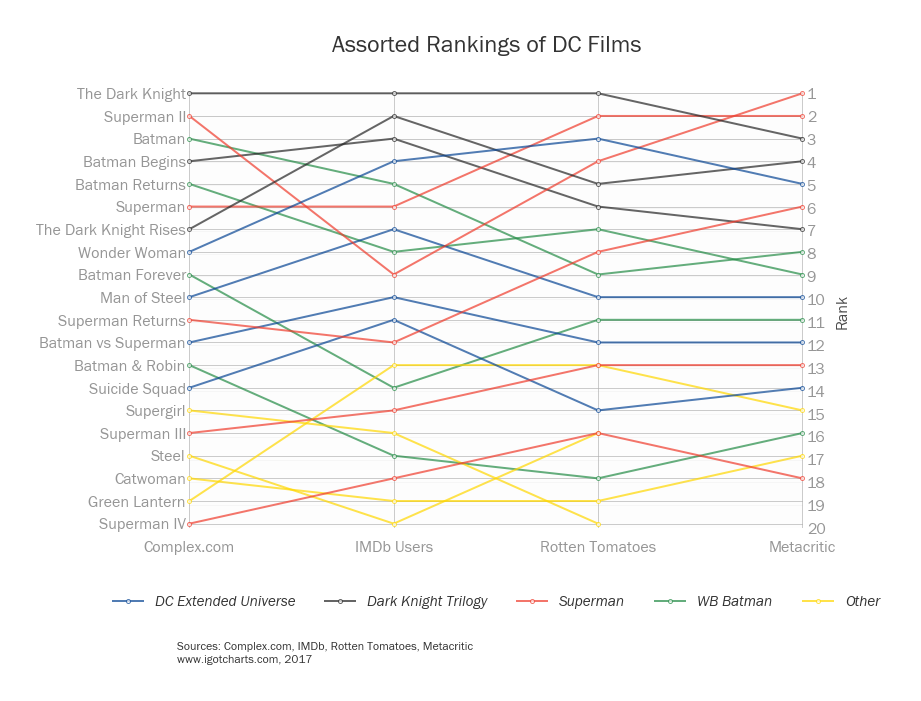

In [404]:
chart = charts_function_list.chart_maker(title='Assorted Rankings of DC Films',title_size=24)
fig = chart.initial_fig_axis(figsize=(11,8))
ax = chart.axes_set_up(fig=fig)
for item in range(20):
    plt.plot([0,.25,.5,.75],ratings.iloc[:,item],color=colors.T.iloc[item,0],linewidth=2,marker='o',markersize=4,markerfacecolor='white',label=franchises.T.iloc[item,0],clip_on=False,alpha=.7)
chart.x_axis_setup(ax,0,.751,.25)
chart.y_axis_setup(ax,1,20.2,1)
chart.patch_adder(ax,alpha=.1)
ax.invert_yaxis()
ax.grid(alpha=.8)
ax.set_xticklabels(['','Complex.com','IMDb Users','Rotten Tomatoes','Metacritic'],position=(.5,-.02))
ax.set_yticklabels(np.append('',sorted_titles))
ax2 = ax.twinx()
chart.y_axis_setup(ax2,1,20,1)
ax2.invert_yaxis()
chart.tick_params_(ax=ax)
chart.tick_params_(ax=ax2,)
ax2.set_ylabel('Rank',fontsize=16,alpha=.7)
chart.citations(ax,x=-.02, source_y=-0.28, chart_tag_y=-0.31,fontsize=12, 
                source='Sources: Complex.com, IMDb, Rotten Tomatoes, Metacritic',chart_tag='www.igotcharts.com, 2017',alpha=.8)

handles, labels = ax.get_legend_handles_labels()
frame = pd.DataFrame({'handles':handles,'labels':labels}).drop_duplicates(subset='labels')
frame = pd.concat([frame.sort_values(by='labels')[0:2],frame.sort_values(by='labels')[3:],frame.sort_values(by='labels')[2:3]])
handles, labels = list(frame['handles'].values),list(frame['labels'].values)
legend = ax.legend(labels=labels,handles=handles,bbox_to_anchor=(.5,-.17),ncol=5,loc=10,fontsize=15)
for text in legend.get_texts():
    text.set_color('Black')
    text.set_alpha(.8)
    text.set_style('italic')
    
os.chdir(outputs)
charts_function_list.chart_save('DC_film_comparison')

plt.show()

In [351]:
handles, labels = frame['handles'].values,frame['labels'].values

In [403]:
pd.concat([frame.sort_values(by='labels')[0:2],frame.sort_values(by='labels')[3:],frame.sort_values(by='labels')[2:3]])

,handles,labels
5,Line2D(DC Extended Universe),DC Extended Universe
2,Line2D(Dark Knight Trilogy),Dark Knight Trilogy
12,Line2D(Superman),Superman
0,Line2D(WB Batman),WB Batman
6,Line2D(Other),Other


KeyError: 6